# Data Visualizations with Python

### Base Imports

In [1]:
# for data analysis 
import numpy as np
import pandas as pd
# from scipy import ... 
# from sklearn import ...

# for data visualization
import matplotlib.pyplot as plt
import missingno as msno # to plot missing data
import seaborn as sns
sns.set() # use seaborn defaults

### Set Options

In [2]:
# display up to 999 rows and columns
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [3]:
# enable multiple cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
%%javascript
// increase output display height before scroll
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [5]:
# visualization options
%matplotlib inline
sns.set_style("whitegrid")

### Load & Explore Data

In [6]:
# Data source: https://www.kaggle.com/mauryashubham/english-premier-league-players-dataset
df_raw = pd.read_csv('epldata_final.csv', low_memory=False)

In [92]:
# A bit of data cleaning
df = df_raw.copy()
df = df.drop('fpl_sel', axis=1)
catg_cols = ['name', 'club', 'position', 'nationality']
df.loc[:, catg_cols] = df.loc[:, catg_cols].apply(lambda x: x.astype('category'))

# df.name.cat.categories
# df.club.cat.categories
# df.position.cat.categories
# df.nationality.cat.categories

df.dtypes
df.shape
df.head()
# df.sample(20)
df.tail()
df.describe()

Index(['Aaron Cresswell', 'Aaron Lennon', 'Aaron Mooy', 'Aaron Ramsey',
       'Abdoulaye Doucoure', 'Adam Federici', 'Adam Lallana', 'Adam Smith',
       'Ademola Lookman', 'Adrian',
       ...
       'Winston Reid', 'Xherdan Shaqiri', 'Yannick Bolasie', 'Yaya Toure',
       'Yohan Benalouane', 'Yohan Cabaye', 'YounÃ¨s Kaboul', 'Ã‰tienne Capoue',
       'Ã€ngel Rangel', 'Åukasz FabiaÅ„ski'],
      dtype='object', length=461)

Index(['Arsenal', 'Bournemouth', 'Brighton+and+Hove', 'Burnley', 'Chelsea',
       'Crystal+Palace', 'Everton', 'Huddersfield', 'Leicester+City',
       'Liverpool', 'Manchester+City', 'Manchester+United', 'Newcastle+United',
       'Southampton', 'Stoke+City', 'Swansea', 'Tottenham', 'Watford',
       'West+Brom', 'West+Ham'],
      dtype='object')

Index(['AM', 'CB', 'CF', 'CM', 'DM', 'GK', 'LB', 'LM', 'LW', 'RB', 'RM', 'RW',
       'SS'],
      dtype='object')

Index(['Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Belgium',
       'Benin', 'Bermuda', 'Bosnia', 'Brazil', 'Cameroon', 'Canada', 'Chile',
       'Colombia', 'Congo DR', 'Cote d'Ivoire', 'Croatia', 'Curacao',
       'Czech Republic', 'Denmark', 'Ecuador', 'Egypt', 'England', 'Estonia',
       'Finland', 'France', 'Germany', 'Ghana', 'Greece', 'Iceland', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Kenya', 'Mali', 'Morocco',
       'Netherlands', 'New Zealand', 'Nigeria', 'Northern Ireland', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Scotland', 'Senegal', 'Serbia',
       'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'The Gambia', 'Trinidad and Tobago', 'Tunisia', 'United States',
       'Uruguay', 'Venezuela', 'Wales'],
      dtype='object')

name            category
club            category
age                int64
position        category
position_cat       int64
market_value     float64
page_views         int64
fpl_value        float64
fpl_points         int64
region           float64
nationality     category
new_foreign        int64
age_cat            int64
club_id            int64
big_club           int64
new_signing        int64
dtype: object

(461, 16)

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,121,2.0,France,0,4,1,1,0


,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
456,Edimilson Fernandes,West+Ham,21,CM,2,5.0,288,4.5,38,2.0,Switzerland,0,1,20,0,1
457,Arthur Masuaku,West+Ham,23,LB,3,7.0,199,4.5,34,4.0,Congo DR,0,2,20,0,1
458,Sam Byram,West+Ham,23,RB,3,4.5,198,4.5,29,1.0,England,0,2,20,0,0
459,Ashley Fletcher,West+Ham,21,CF,1,1.0,412,4.5,16,1.0,England,0,1,20,0,1
460,Diafra Sakho,West+Ham,27,CF,1,10.0,214,5.5,12,4.0,Senegal,0,3,20,0,0


,age,position_cat,market_value,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,460.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,2.180043,11.012039,763.776573,5.447939,57.314534,1.993478,0.034707,3.206074,10.334056,0.303688,0.145336
std,3.961892,1.000061,12.257403,931.805757,1.346695,53.113811,0.957689,0.183236,1.279795,5.726475,0.460349,0.352822
min,17.000000,1.000000,0.050000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24.000000,1.000000,3.000000,220.000000,4.500000,5.000000,1.000000,0.000000,2.000000,6.000000,0.000000,0.000000
50%,27.000000,2.000000,7.000000,460.000000,5.000000,51.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000
75%,30.000000,3.000000,15.000000,896.000000,5.500000,94.000000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000
max,38.000000,4.000000,75.000000,7664.000000,12.500000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000


# Missing Data
https://github.com/ResidentMario/missingno

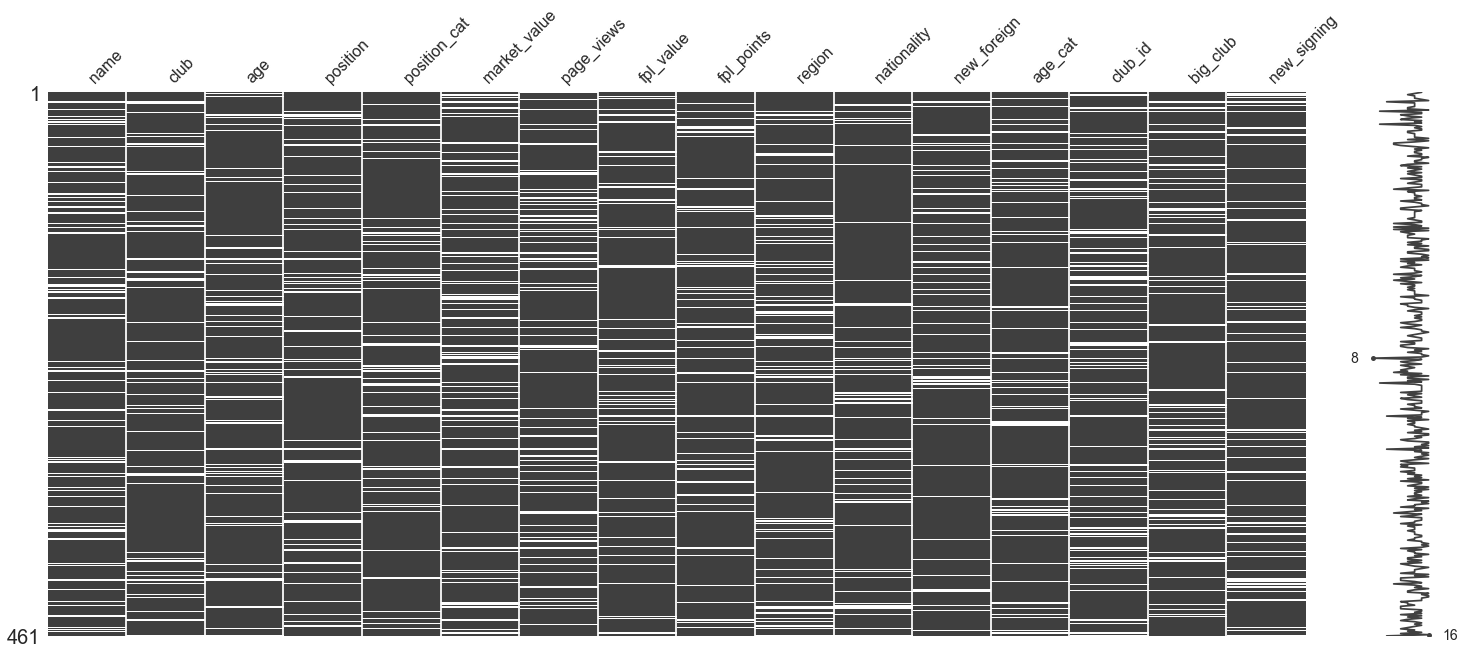

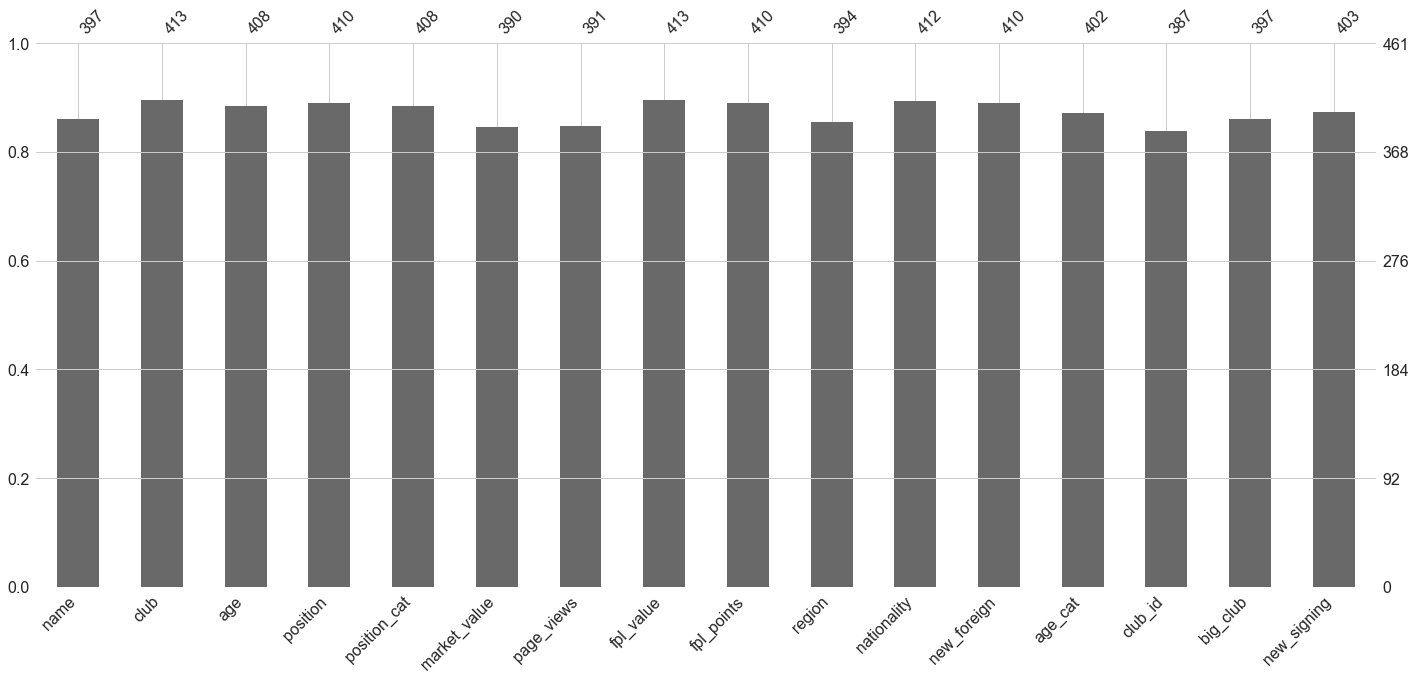

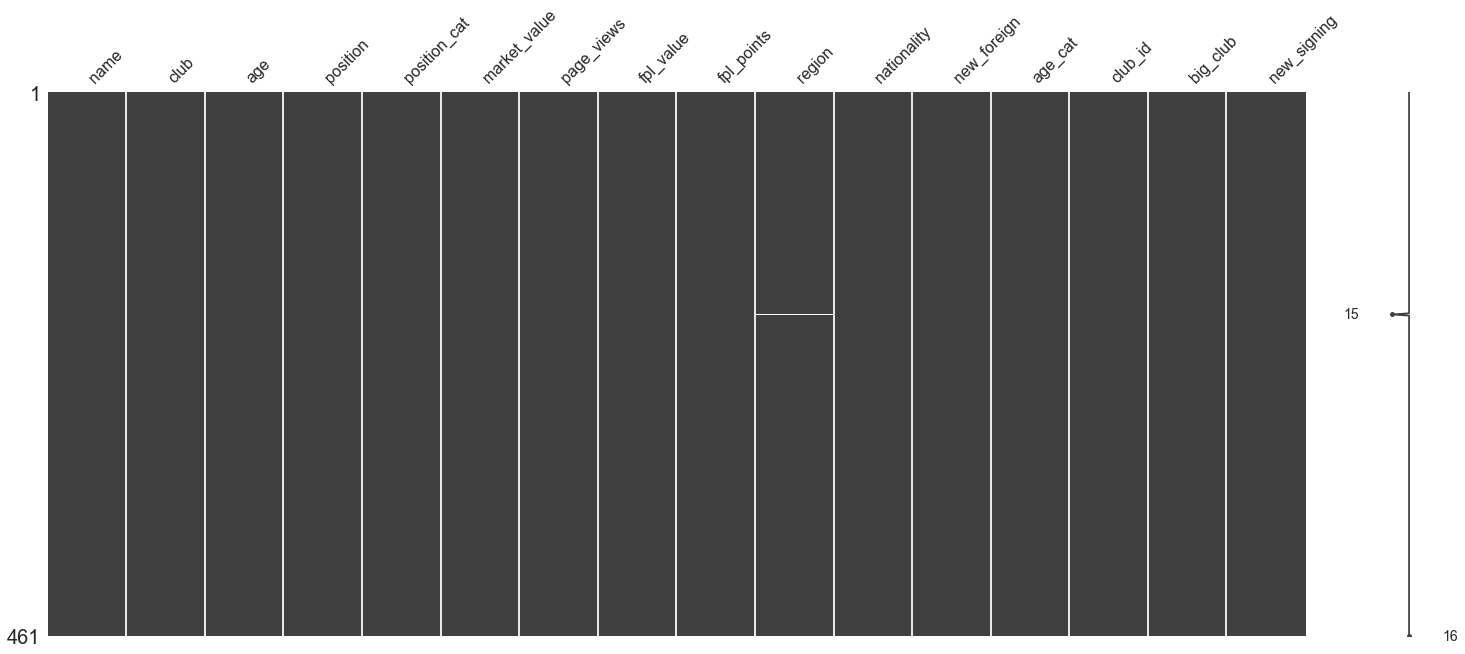

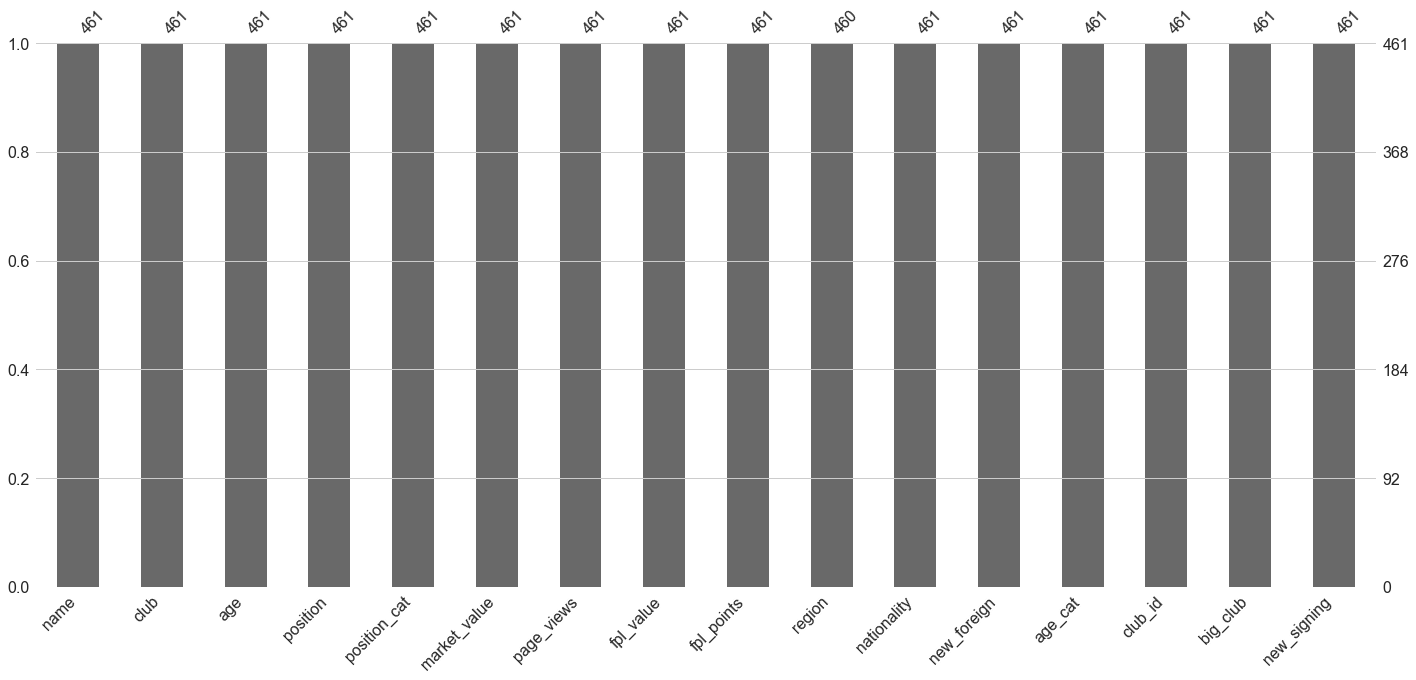

In [8]:
# create some fake missing data
rand_rows = np.random.randint(0, len(df), 1000)
rand_cols = np.random.randint(0, len(df.columns), 1000)
missing_df = df.copy()
missing_df.loc[:, missing_df.columns] = missing_df.loc[:, missing_df.columns].apply(lambda x: x.astype('str'))
for i,j in zip(rand_rows,rand_cols): 
    missing_df.iat[i,j] = np.nan

# visualize fake missing data
msno.matrix(missing_df)
msno.bar(missing_df)

# visualize real dataset
msno.matrix(df)
msno.bar(df)
df.region = df.region.fillna(0) # fill in our single missing value as 0

# Quantitative Data

## Continuous Data

### Univariate

#### Histogram (w/ Density Curve)
https://seaborn.pydata.org/generated/seaborn.distplot.html

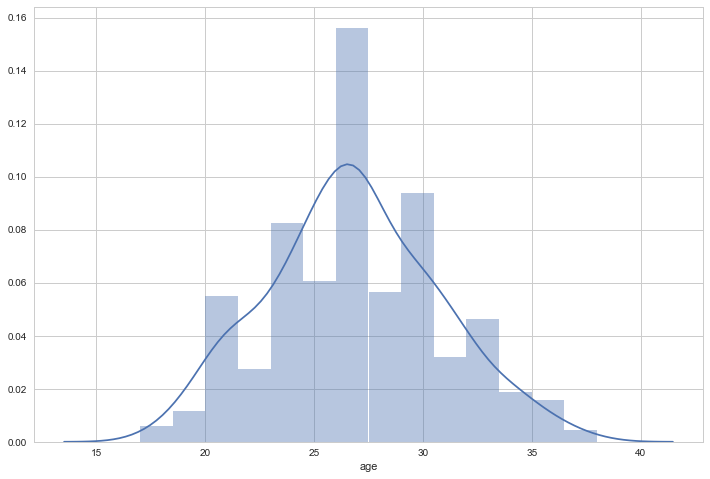

In [51]:
# Set figure size
plt.figure(figsize=(12,8))

ax = sns.distplot(df.age) # set kde=False to remove density curve

#### Dot Plot
https://seaborn.pydata.org/generated/seaborn.regplot.html

In [40]:
# Set figure size
plt.figure(figsize=(12,8))

#### Box Plot
https://seaborn.pydata.org/generated/seaborn.boxplot.html

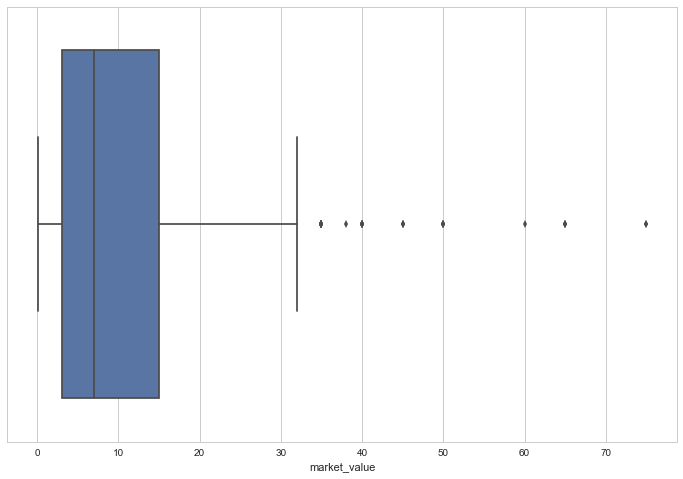

In [24]:
# Set figure size
plt.figure(figsize=(12,8))

ax = sns.boxplot(x=df.market_value)

### Bivariate

#### Scatter Plot
https://seaborn.pydata.org/generated/seaborn.regplot.html

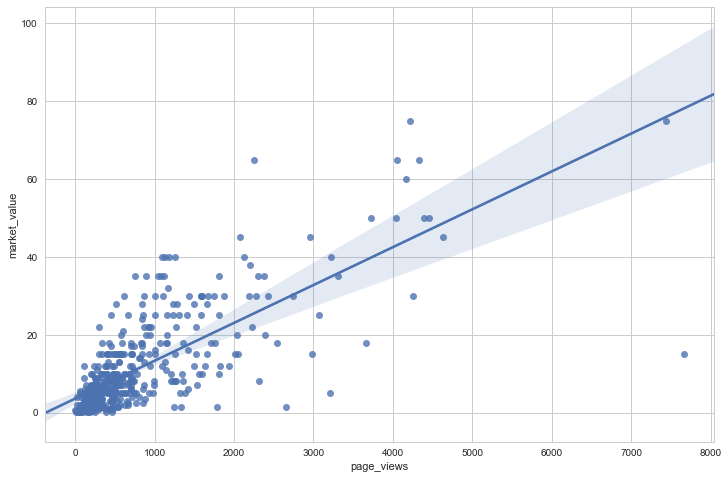

In [47]:
# Set figure size
plt.figure(figsize=(12,8))

ax = sns.regplot(x="page_views", y="market_value", data=df)

### Multivariate

#### Parallel Coordinate Plot

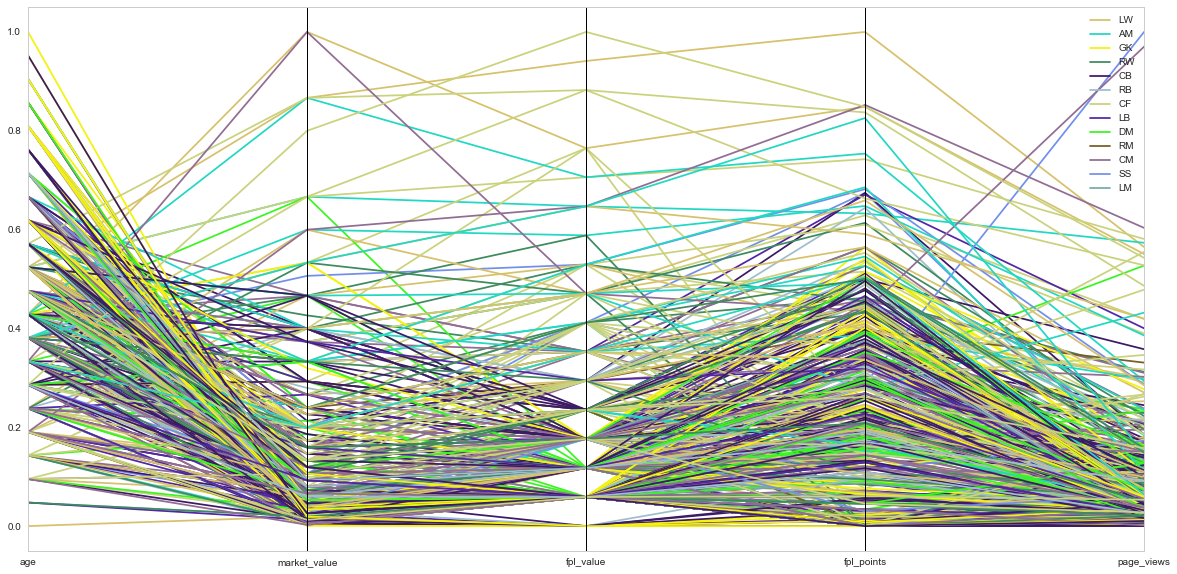

In [99]:
# Set figure size
plt.figure(figsize=(20,10))

# Make the plot
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # for scaling data

cols = ['age', 'market_value', 'fpl_value', 'fpl_points', 'page_views']
pcp_df = pd.DataFrame(scaler.fit_transform(df.loc[: , cols]),columns = cols)
pcp_df['position'] = df.position

parallel_coordinates(pcp_df, 'position')
plt.show()


#### Scatterplot Matrix
https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

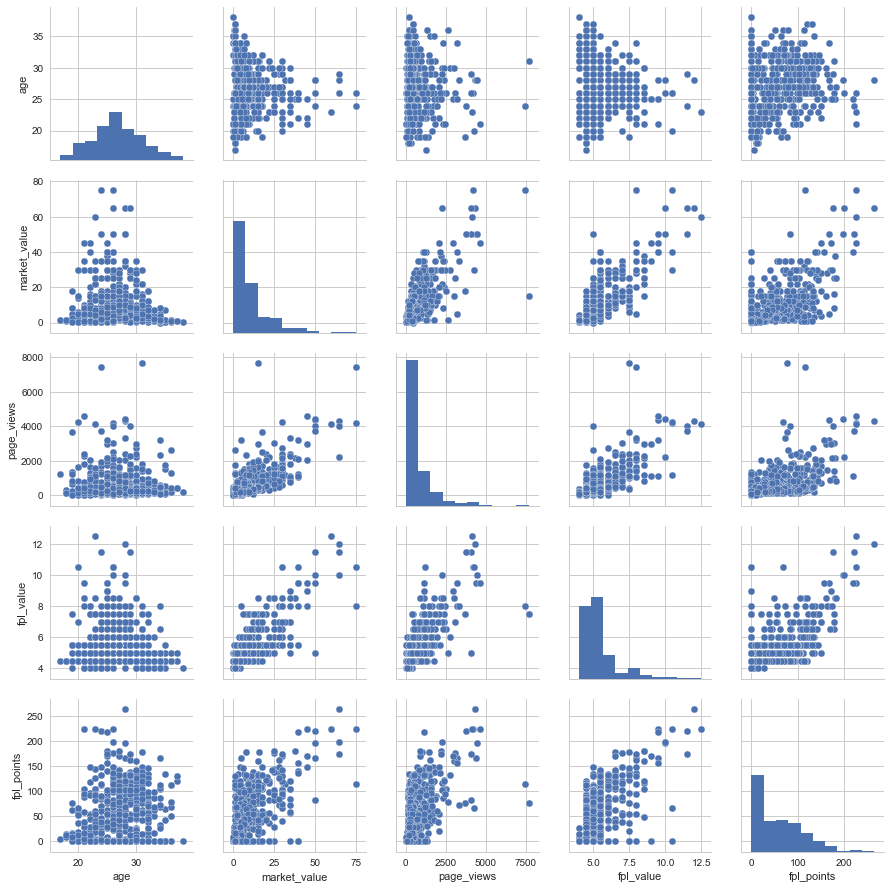

In [91]:
# Set figure size
plt.figure(figsize=(20,10))

# Make the plot
cols = ['age', 'market_value', 'page_views', 'fpl_value', 'fpl_points']
splom_df = df.loc[: , cols]

g = sns.pairplot(splom_df)

## Discrete Data 

### Univariate

#### Bar Chart

### Bivariate

#### Scatter Plot

### Multivariate

#### Parallel Coordinate Plot

In [10]:
# from pandas.plotting import parallel_coordinates

# data = pd.read_csv('data/iris.data')

# plt.figure()

# parallel_coordinates(data, 'Name')

#### Mosaic Plot

# Categorical Data

## Nominal Data

#### Bar Chart

In [11]:
# Set figure size
plt.figure(figsize=(12,12))

# Select year and cause of death 
data = df[(df.Year == 2014) & (df.Leading_Cause == 'Malignant Neoplasms (Cancer: C00-C97)')]

# Create chart
ax = sns.barplot(x='Race_Ethnicity', y='Death_Rate',  hue='Sex', data=data)

# Set title and rotate axes
plt.title("Cancer Death Rate by Sex and Ethnicity 2014")
plt.xticks(rotation=45) 

AttributeError: 'DataFrame' object has no attribute 'Year'

#### Horizontal Bar Chart

In [ ]:
# Set figure size
plt.figure(figsize=(12,12))

# Select year and cause of death 
data = df[(df.Year == 2014) & (df.Leading_Cause == 'Malignant Neoplasms (Cancer: C00-C97)')]

# Create chart
ax = sns.barplot(x='Death_Rate', y='Race_Ethnicity',  hue='Sex', data=data)

# Set title
plt.title("Cancer Death Rate by Sex and Ethnicity 2014")

#### Faceted Bar Charts

In [ ]:
# # Plot the "Count" of the top 5 highest "Rank" for "Childs_First_Name" in year "2014" by "Ethnicity"
data = df[df.Year == 2014]\
    .groupby(['Leading_Cause', 'Race_Ethnicity'])\
    .agg({'Deaths':sum})\
    .reset_index()

# # Names for x ticks
names = data.Race_Ethnicity.unique()

# # Create facet plots as bar charts
g = sns.FacetGrid(data, col='Leading_Cause', col_wrap=2, size=4, aspect=2, sharey=False)
g.map(sns.barplot, 'Race_Ethnicity', 'Deaths', order=names)

# # Make x ticks available for each subplot
for ax in g.axes.flat:
    _ = plt.setp(ax.get_xticklabels(), visible=True, rotation=30)

# # Increase space between subplots
plt.subplots_adjust(hspace=0.5)

# Set title and rotate axes
plt.title("Death Counts by Leading Cause and Ethnicity 2014")

## Oridinal Data

#### Bar Chart

In [ ]:



data = df[df.Gender == 'FEMALE']
data.head()
# data = df[df.Rank < 20]

# df2.plot.bar();

#### Stacked Bar Charts

In [ ]:
# df2.plot.bar(stacked=True);

## Heat Map

In [ ]:
# sns.heatmap(data,linewidth=0,yticklabels=yticks,xticklabels=xticks)

## Time Series

## Violin Plot

In [ ]:
# sns.violinplot(data=df, inner="points", ax=ax)    